<h1><center>Coding Questions (15 Marks)</center></h1>

### Question 1 (Coding): K-Means Clustering (6 Marks)

Load the Iris dataset using sklearn.datasets.load_iris. For simplicity, use only the first two
features (sepal length and sepal width). Visualize the dataset as a scatter plot.

Tasks:
* Apply the K-Means algorithm to cluster the data with K=3.
* Plot the resulting clusters and centroids.
* Discuss the limitations of K-Means, particularly with this dataset.

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

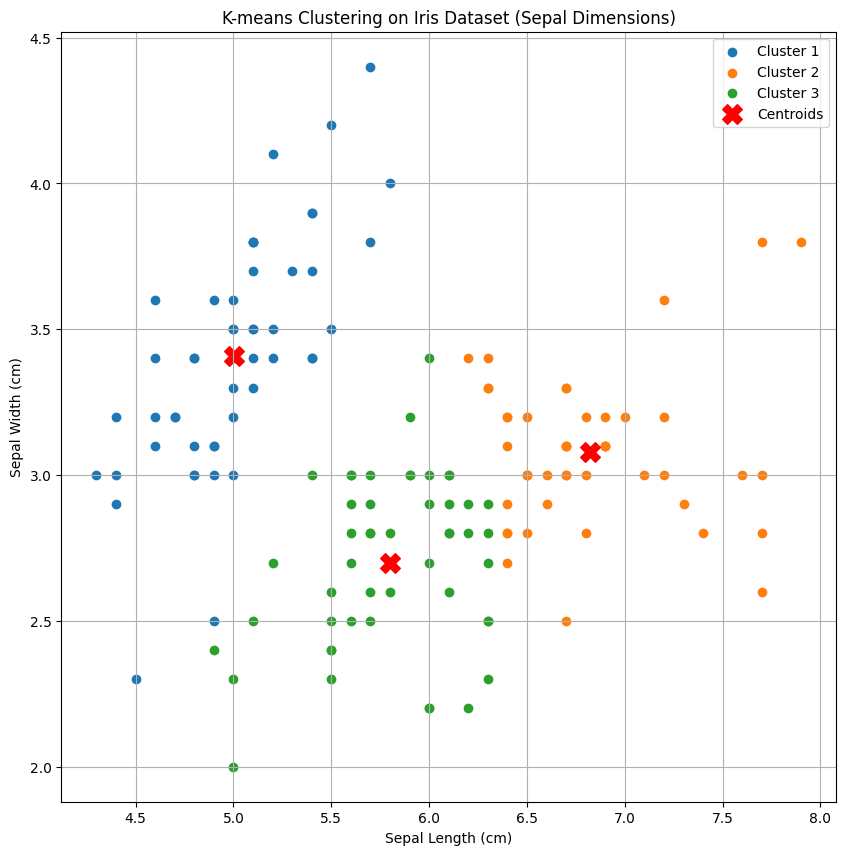

In [3]:
#Load iris dataset
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

#Extract the sepal length and sepal width features
sepal_length = data.iloc[:,0].values
sepal_width = data.iloc[:,1].values
X = np.column_stack((sepal_length, sepal_width))

#Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=22)
kmeans.fit(X)

#Get cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

#Plot the clusters and centroids
plt.figure(figsize=(10, 10))
for cluster in range(3):
    plt.scatter(X[labels==cluster,0], X[labels==cluster,1], label=f'Cluster {cluster+1}')
    
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering on Iris Dataset (Sepal Dimensions)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()

### Question 2 (Coding): DBSCAN on Iris Dataset (6 Marks)

We used the same data (iris data) for this question. Similar to the previous question, use only the
first two features (sepal length and sepal width) for simplicity.

Tasks:
* Apply the DBSCAN algorithm to the dataset (eps = 0.5, min_samples = 5) and plot the
clustering results as a scatter plot.
* Briefly explain how eps and min_samples influence the results.

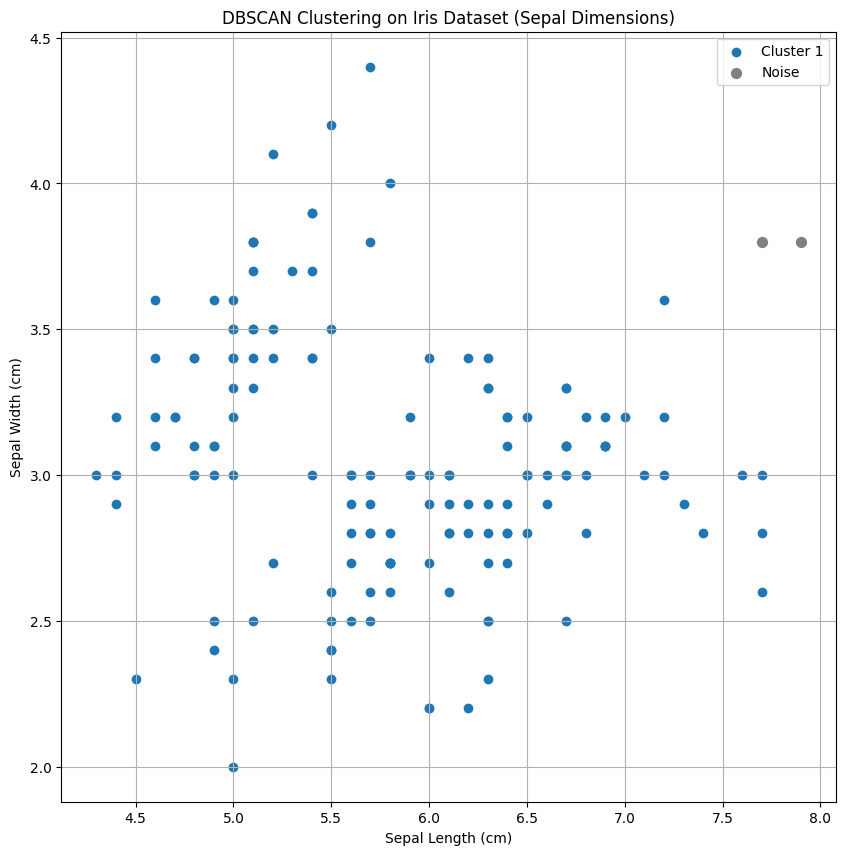

In [5]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# Get unique labels (-1 represents noise)
unique_labels = set(labels)

# Plot the clusters
plt.figure(figsize=(10, 10))
for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], c='gray', label='Noise', s=50)
    else:
        # Cluster points
        plt.scatter(X[labels == label, 0], X[labels == label, 1], label=f'Cluster {label + 1}')

plt.title('DBSCAN Clustering on Iris Dataset (Sepal Dimensions)')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.grid()
plt.show()

### Question 3: Comparing K-Means and DBSCAN Results (3 marks)

<h1><center>Conceptual Questions (5 Marks)</center></h1>

### Question 1 (3 Marks):
1. Explain the Elbow Method for determining the number of clusters in K-Means.
2. Suppose you applied K-Means clustering to a dataset and plotted the SSE for cluster counts
1 through 10. You observe a significant "elbow" at K=4. What does this suggest about the
dataset? Why?

### Question 2 (3 Marks):
1. Refer to the dendrogram below (Hierarchical Clustering – Complete Linkage). How many
clusters are formed if the dendrogram is cut at a distance of 0.6? (1.5 points)

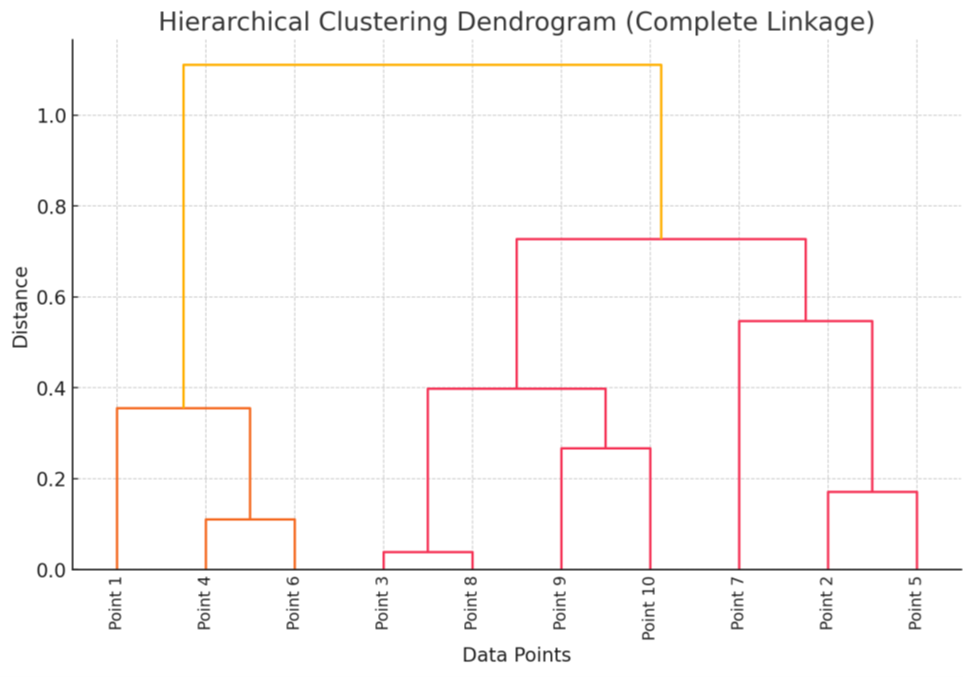

In [7]:
from IPython.display import Image, display
display(Image(filename='Dendogram.png'))

2. Explain how the choice of linkage method (e.g., single, complete, average) affects the
results (compare the 3 methods in terms of two aspects, e.g., cluster shape, sensitivity to
noise, etc.). (1.5 points)